# 板凳龙碰撞检测

本notebook用于测试`Model_2`类的碰撞检测功能，判断某一时刻是否发生碰撞。

In [1]:
import numpy as np
from model_2 import Model_2

In [2]:
# 初始化模型参数
num_sections = 223  # 板凳龙节数
head_length = 2.86  # 头部长度 (m)
body_length = 1.65  # 身体每节长度 (m)  
distance = 0.55  # 螺距 (m)
extension = 0.275  # 连接点到窄边的距离 (m)
width = 0.3  # 宽度 (m)

# 创建 Model_2 实例
model = Model_2(num_sections, head_length, body_length, distance, extension, width)

## 单时刻碰撞检测

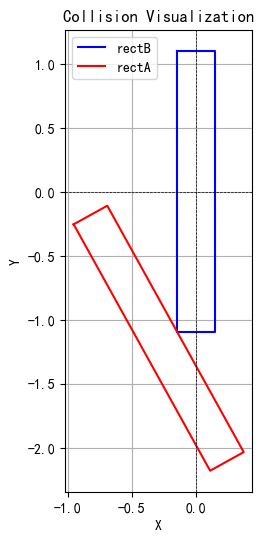

Collision detected between bench 1 and bench 10 at time 425.0
碰撞发生！


In [3]:
# 使用Model_1的pos_trace_moment方法推理板凳龙连接点的位置
theta_start = 32.0 * np.pi  # 起始极角
time = 425.0        # 时间 (s)
velocity = 1.0     # 速度 (m/s)
step = 0.01        # 步长

# 调用pos_trace_moment方法获取位置结果
pos_result = model.pos_trace_moment(theta_start, time, velocity, step)

# 检测碰撞
collision_detected = model.trace_collision(pos_result)

# 输出结果
if collision_detected:
    print("碰撞发生！")
else:
    print("未检测到碰撞。")

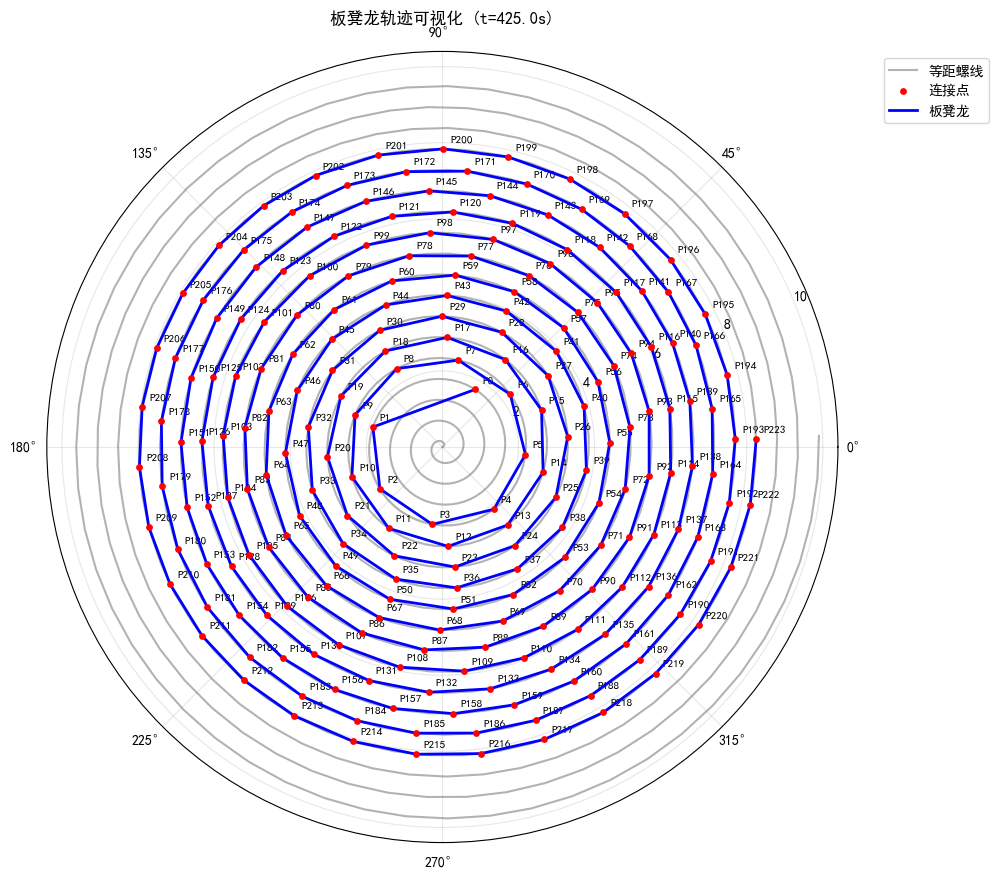

(<Figure size 1000x1000 with 1 Axes>,
 <PolarAxes: title={'center': '板凳龙轨迹可视化 (t=425.0s)'}>)

In [4]:
# 可视化位置结果
model.visualize(pos_result)

## 固定步长+二分法查找最大盘入时间

当前时间: 300.00 秒，正在检测...
当前时间: 305.00 秒，正在检测...
当前时间: 305.00 秒，正在检测...
当前时间: 310.00 秒，正在检测...
当前时间: 310.00 秒，正在检测...
当前时间: 315.00 秒，正在检测...
当前时间: 315.00 秒，正在检测...
当前时间: 320.00 秒，正在检测...
当前时间: 320.00 秒，正在检测...
当前时间: 325.00 秒，正在检测...
当前时间: 325.00 秒，正在检测...
当前时间: 330.00 秒，正在检测...
当前时间: 330.00 秒，正在检测...
当前时间: 335.00 秒，正在检测...
当前时间: 335.00 秒，正在检测...
当前时间: 340.00 秒，正在检测...
当前时间: 340.00 秒，正在检测...
当前时间: 345.00 秒，正在检测...
当前时间: 345.00 秒，正在检测...
当前时间: 350.00 秒，正在检测...
当前时间: 350.00 秒，正在检测...
当前时间: 355.00 秒，正在检测...
当前时间: 355.00 秒，正在检测...
当前时间: 360.00 秒，正在检测...
当前时间: 360.00 秒，正在检测...
当前时间: 365.00 秒，正在检测...
当前时间: 365.00 秒，正在检测...
当前时间: 370.00 秒，正在检测...
当前时间: 370.00 秒，正在检测...
当前时间: 375.00 秒，正在检测...
当前时间: 375.00 秒，正在检测...
当前时间: 380.00 秒，正在检测...
当前时间: 380.00 秒，正在检测...
当前时间: 385.00 秒，正在检测...
当前时间: 385.00 秒，正在检测...
当前时间: 390.00 秒，正在检测...
当前时间: 390.00 秒，正在检测...
当前时间: 395.00 秒，正在检测...
当前时间: 395.00 秒，正在检测...
当前时间: 400.00 秒，正在检测...
当前时间: 400.00 秒，正在检测...
当前时间: 405.00 秒，正在检测...
当前时间: 405.00 秒，正在检测...
当前时间: 410.0

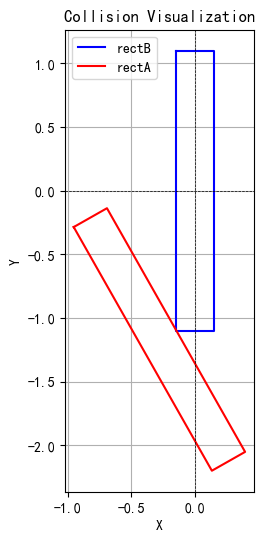

Collision detected between bench 1 and bench 10 at time 424.9000000000284
发生碰撞，大致时间范围: 424.8000000000284 秒 到 424.9000000000284 秒
二分法第 1 次迭代...
未发生碰撞，更新下界为: 424.850000 秒
二分法第 2 次迭代...
未发生碰撞，更新下界为: 424.850000 秒
二分法第 2 次迭代...


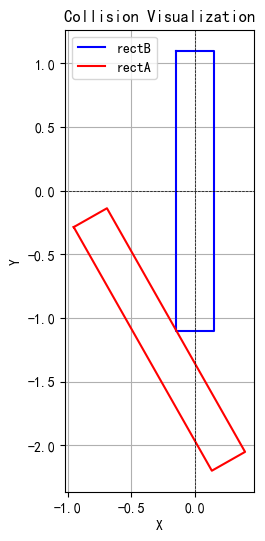

Collision detected between bench 1 and bench 10 at time 424.8750000000284
发生碰撞，更新上界为: 424.875000 秒
二分法第 3 次迭代...


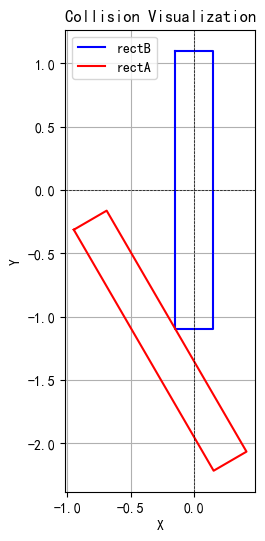

Collision detected between bench 1 and bench 10 at time 424.8625000000284
发生碰撞，更新上界为: 424.862500 秒
二分法第 4 次迭代...


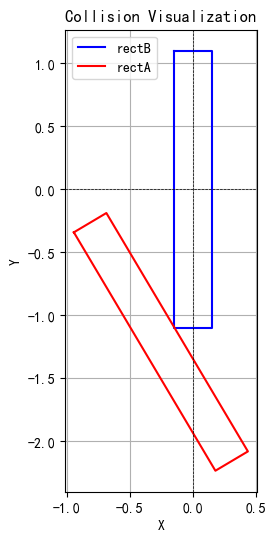

Collision detected between bench 1 and bench 10 at time 424.85625000002835
发生碰撞，更新上界为: 424.856250 秒
二分法第 5 次迭代...


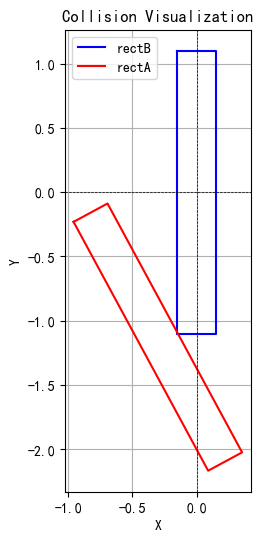

Collision detected between bench 1 and bench 10 at time 424.8531250000284
发生碰撞，更新上界为: 424.853125 秒
二分法第 6 次迭代...


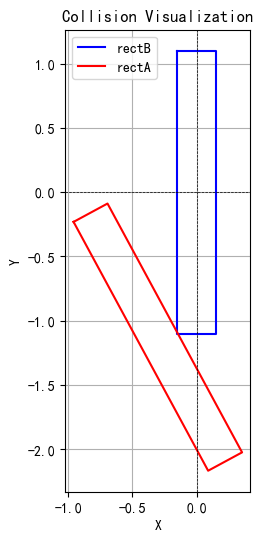

Collision detected between bench 1 and bench 10 at time 424.8515625000284
发生碰撞，更新上界为: 424.851563 秒
精确的最大无碰撞时间范围: 424.850000 秒 到 424.851563 秒


In [6]:
# 固定步长查找碰撞的大致时间范围
time_step = 0.1
lower_bound = 300.0
upper_bound = 425.0

current_time = lower_bound
last_valid_time = lower_bound
last_valid_position = None

while current_time <= upper_bound:
    # 每隔5秒提示一次
    if int((current_time - lower_bound) / time_step) % 50 == 0:
        print(f"当前时间: {current_time:.2f} 秒，正在检测...")
    
    # 获取当前位置
    pos_result = model.pos_trace_moment(theta_start, current_time, velocity, step)
    
    # 检测碰撞
    if model.trace_collision(pos_result):
        print(f"发生碰撞，大致时间范围: {last_valid_time} 秒 到 {current_time} 秒")
        break
    
    # 更新最后一个无碰撞的时间
    last_valid_time = current_time
    last_valid_position = pos_result
    current_time += time_step

# 如果未发生碰撞
if current_time > upper_bound:
    print("在最大时间范围内未发生碰撞。")
    print(f"终止时间为: {last_valid_time} 秒")

# 二分法进一步精确碰撞时间范围
for i in range(6):
    print(f"二分法第 {i+1} 次迭代...")
    mid_time = (last_valid_time + current_time) / 2
    
    # 获取当前位置
    pos_result = model.pos_trace_moment(theta_start, mid_time, velocity, step)
    
    # 检测碰撞
    if model.trace_collision(pos_result):
        print(f"发生碰撞，更新上界为: {mid_time:.6f} 秒")
        current_time = mid_time
    else:
        print(f"未发生碰撞，更新下界为: {mid_time:.6f} 秒")
        last_valid_time = mid_time
        last_valid_position = pos_result

# 输出最终结果
print(f"精确的最大无碰撞时间范围: {last_valid_time:.6f} 秒 到 {current_time:.6f} 秒")

二分法第 1 次迭代...
未发生碰撞，更新下界为: 424.850085 秒
二分法第 2 次迭代...
未发生碰撞，更新下界为: 424.850085 秒
二分法第 2 次迭代...
未发生碰撞，更新下界为: 424.850092 秒
二分法第 3 次迭代...
未发生碰撞，更新下界为: 424.850092 秒
二分法第 3 次迭代...
未发生碰撞，更新下界为: 424.850095 秒
二分法第 4 次迭代...
未发生碰撞，更新下界为: 424.850095 秒
二分法第 4 次迭代...
未发生碰撞，更新下界为: 424.850096 秒
二分法第 5 次迭代...
未发生碰撞，更新下界为: 424.850096 秒
二分法第 5 次迭代...
未发生碰撞，更新下界为: 424.850097 秒
二分法第 6 次迭代...
未发生碰撞，更新下界为: 424.850097 秒
二分法第 6 次迭代...


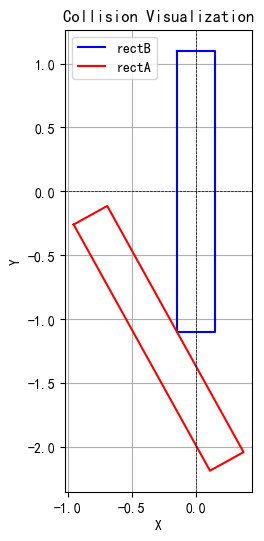

Collision detected between bench 1 and bench 10 at time 424.8500972748087
发生碰撞，更新上界为: 424.850097 秒
精确的最大无碰撞时间范围: 424.850097 秒 到 424.850097 秒


In [8]:
# 二分法进一步精确碰撞时间范围
for i in range(6):
    print(f"二分法第 {i+1} 次迭代...")
    mid_time = (last_valid_time + current_time) / 2
    
    # 获取当前位置
    pos_result = model.pos_trace_moment(theta_start, mid_time, velocity, step)
    
    # 检测碰撞
    if model.trace_collision(pos_result):
        print(f"发生碰撞，更新上界为: {mid_time:.6f} 秒")
        current_time = mid_time
    else:
        print(f"未发生碰撞，更新下界为: {mid_time:.6f} 秒")
        last_valid_time = mid_time
        last_valid_position = pos_result

# 输出最终结果
print(f"精确的最大无碰撞时间范围: {last_valid_time:.6f} 秒 到 {current_time:.6f} 秒")

In [9]:
# 保存位置及速度信息
import datetime
import os

current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# 添加时间后缀到输出文件名，基于项目根目录
pos_output_file = f"../data/output/q2_positions_{current_time}.xlsx"
v_output_file = f"../data/output/q2_velocities_{current_time}.xlsx"

# 如果计算成功，保存位置数据
if 'last_valid_position' in locals() and last_valid_position:
    model.save_position(last_valid_position, pos_output_file)
    print(f"文件已保存到: {os.path.abspath(pos_output_file)}")
else:
    print("未计算到有效的连接点位置，无法保存数据。")

# 计算当前时刻速度信息
v_result = model.v_trace_moment(last_valid_position, velocity)
if 'v_result' in locals() and v_result:
    model.save_velocity(v_result, v_output_file)
    print(f"速度数据已保存到: {os.path.abspath(v_output_file)}")

位置数据已保存到: ../data/output/q2_positions_20250814_120346.xlsx
添加了时刻: 424.85009689333896 s
文件已保存到: e:\ywc大学\大三上\数模国赛\模拟\CUMCM2024_A\data\output\q2_positions_20250814_120346.xlsx
速度数据已保存到: ../data/output/q2_velocities_20250814_120346.xlsx
添加了时刻: 424.85009689333896 s
速度数据已保存到: e:\ywc大学\大三上\数模国赛\模拟\CUMCM2024_A\data\output\q2_velocities_20250814_120346.xlsx


## 结论
最终确定最大盘入时间为424.850097s